In [142]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import misc
import scipy.stats
from scipy.optimize import minimize

In [150]:
#number of perturbations
n_perturbs=1000
signatures=True # True=only signature level information desired, False=gene level information desired

#rough factor describing the fold change in representation between the 90th and 10th percentile of perturbations
fc_90_10=6 #default 6-fold, Wang 2013 

#stringency (the minimum percentile you would like to reasonably represent)
stringency=0.1 #default 10th percentile

In [151]:
#rough approximation of scale required for individual gene differential expression
scale_factor=100

if signatures:
    #or signature level differential expression
    scale_factor=10

In [152]:
#representation factor, search for location and scale of normal distribution to determine parameters satisfying minimum representation and distribution width

x0 = np.array([fc_90_10*scale_factor,scale_factor])

def optimize_normal_cdf(x):
    fc10_90=scipy.stats.norm.ppf([.1,.9],loc=x[0],scale=x[1])
    ratio90_10=np.divide(fc10_90[1],fc10_90[0])
    mincells=scipy.stats.norm.ppf([stringency],loc=x[0],scale=x[1])[0]
    return np.power(ratio90_10-fc_90_10,2)+np.power(mincells-scale_factor,2)

res = minimize(optimize_normal_cdf, x0, method='nelder-mead',options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 84
         Function evaluations: 167


In [153]:
lf,sf=res.final_simplex[0][0]

In [154]:
pltmin,pltmax=scipy.stats.norm.ppf([0.05,0.95],loc=lf,scale=sf)

In [155]:
ecdf=scipy.stats.norm.cdf(np.arange(pltmin,pltmax),loc=lf,scale=sf)

Roughly 35000 Total Cells Required


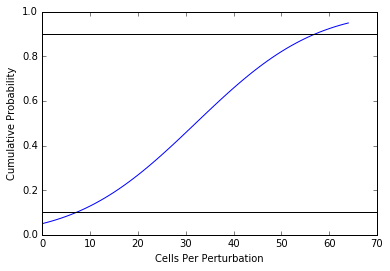

In [156]:
#plot CDF of cells per perturbation
plt.plot(ecdf)
plt.axhline(0.1,c='black')
plt.axhline(0.9,c='black')
plt.xlabel('Cells Per Perturbation')
plt.ylabel('Cumulative Probability')

total_cells=lf*n_perturbs
print('Roughly '+str(int(np.round(total_cells)))+' Total Cells Required')